In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Problem 1: Following the guidelines below, perform hierarchical clustering of the data from data_problem1.mat (or data_problem1.csv) in the space of first few eigenvectors (decide yourself how many modes to use). Guidelines: 
 
> a) Perform PCA on the data (the data has 57 variables and 672 observations in time) and decide how many modes to keep. [1 point for correct PCA, 1 point for a reasonable choice of modes to keep]. 
 
> b) Perform hierarchical clustering with Ward's method on the data in the PC space of the modes you kept. Plot the dendrogram. [1 point for correct dendrogram]. 
 
> c) Chose three possible options for the optimal number of clusters (k) and plot the results (clustered data in PC space) for those options. [1 point for the correct choices of k, 1 point for the plots] 
 
> d) For only one of the cluster options above (on choice of k): plot, on the same graph, the mean pattern (57 variables) of each cluster (using the reconstructed data according to the selected number of PC modes). Plot the time-series (672 points) of occurrences of these clusters. [1 point for the mean patterns plot, 1 point for the time-series plot] 
 

## Read and Visualize Data

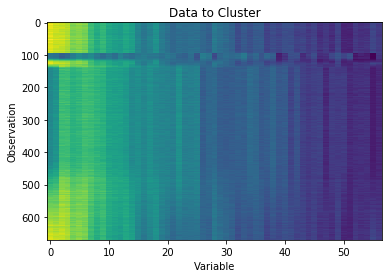

In [17]:
df = pd.read_csv('data_problem1.csv') 

#visualize measurements

plt.imshow(df,aspect='auto')
plt.xlabel('Variable')
plt.ylabel('Observation')
plt.title('Data to Cluster')

plt.show()

## Perform PCA - I chose 3 modes

In [13]:
#normalize data and check it out
data_norm = (df - df.mean())/df.std()
## We want to run PCA
n_modes = np.min(np.shape(data_norm))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data_norm)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_
n=3
print(np.sum(fracVar[:n])*100)  #sum of the first n modes = total percent variance explained by the first neigvecs
print(np.shape(eigvecs))
#investigate: did PCA work as we expected?  What size of variables do we expect?
nObservations = np.shape(data_norm)[0]
nVariables = np.shape(data_norm)[1] 
print('Expected sizes:')
print('\t' + str(nVariables) + ' eigenvectors, each of length ' + str(nVariables))
print('\t' + str(nVariables) + ' eigenvalues, one for each eigenvector')
print('\t' + str(nVariables) + ' PCs, each of length ' + str(nObservations))
print('Actual sizes:')
print('\t' + str(np.shape(eigvecs)[0]) + ' eigenvectors, each of length ' + str(np.shape(eigvecs)[1]))
print('\t' + str(len(fracVar)) + ' eigenvalues')
print('\t' + str(np.shape(PCs)[1]) + ' PCs, each of length ' + str(np.shape(PCs)[0]))

86.30390747224028
(57, 57)
Expected sizes:
	57 eigenvectors, each of length 57
	57 eigenvalues, one for each eigenvector
	57 PCs, each of length 671
Actual sizes:
	57 eigenvectors, each of length 57
	57 eigenvalues
	57 PCs, each of length 671


## Plot fraction of variance explained by each mode

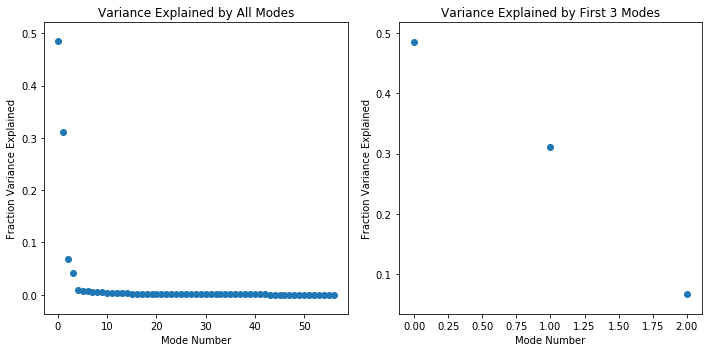

In [25]:


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = n
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

## Plot the first n modes and PCs

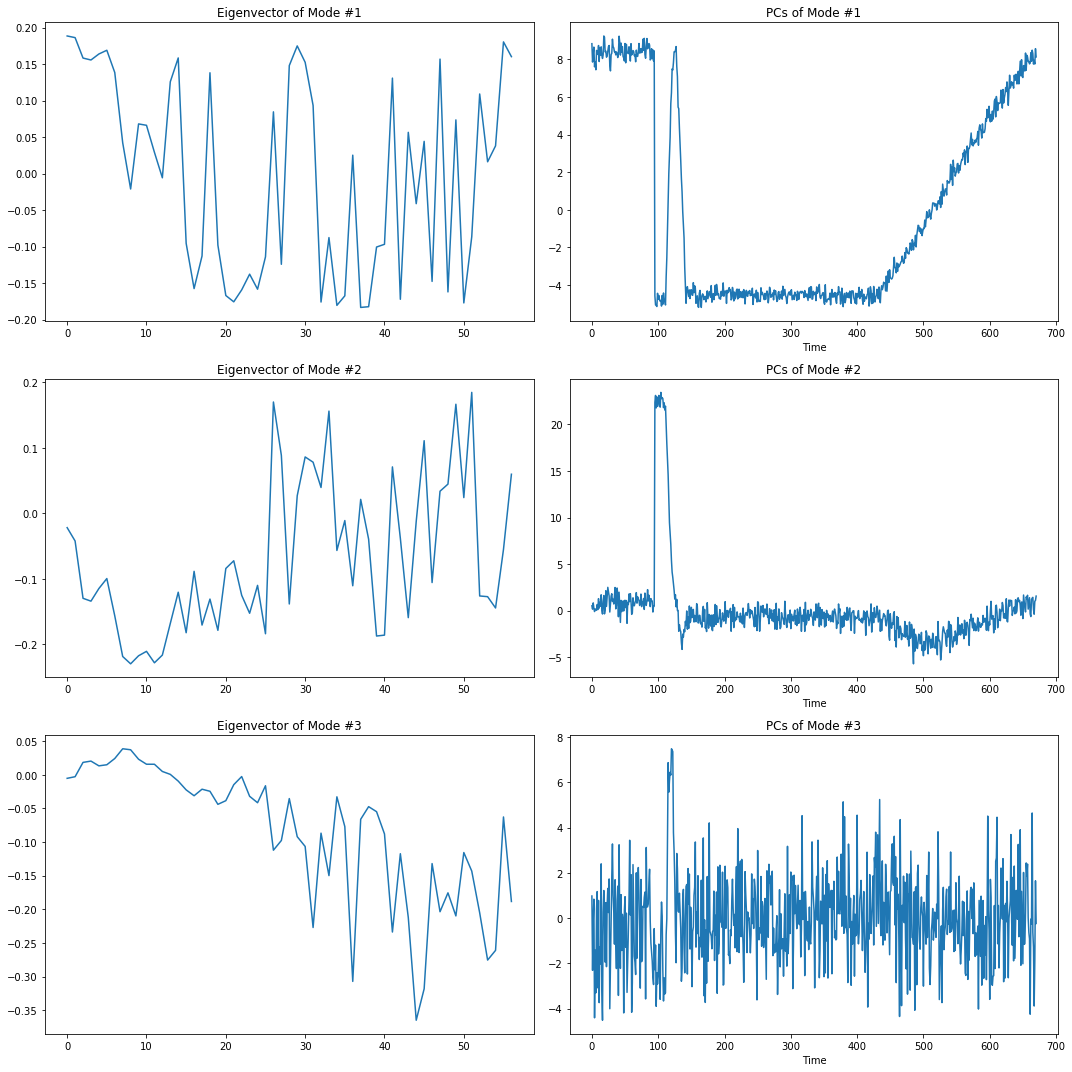

In [26]:
plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Time')
    
    plt.tight_layout()

## Create dendogram in the space of the first three PCs

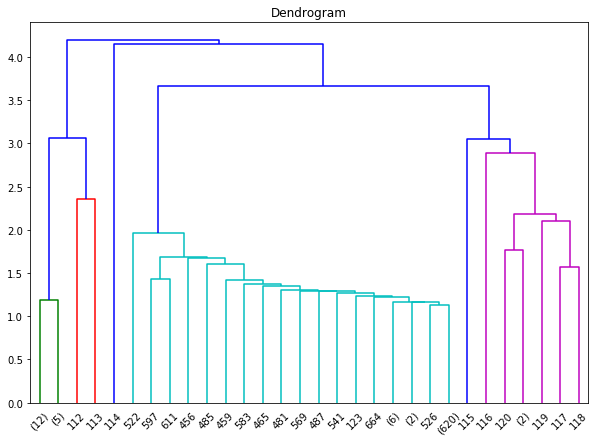

In [27]:


data = PCs[:,:3]
linked = linkage(data)

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=30)
plt.title('Dendrogram')
plt.show()

### Problem 2: Following the guidelines below, perform clustering using self-organizing maps from data_problem2.mat (or data_problem2.csv).  The data is made up of normalized seasonal streamflow from 194 rivers in Alberta, Canada (i.e. there are 194 stations, each with 365 days of normalized streamflow).  The locations of each station are given by a latitude/longitude coordinate pair in stationLon.mat and stationLat.mat (or stationLon.csv and stationLat.csv). 
 
> a) Perform clustering using a 3 x 2 SOM.  Plot the 6 SOM patterns.  Plot the locations of the stations, coloured according to the cluster to which they belong. What is the frequency of each cluster?  [1 point for correct SOM patterns, 1 point for map of clusters, 1 point for correct frequencies] 
 
> b) Perform clustering a differently sized SOM, and plot the SOM patterns, locations of stations coloured by BMU, and frequency of each cluster as in a).  Discuss what you think are two key differences between your results from a) and b).  [1 point for plots, 2 points for discussion] 

> c) Calculate quantization error and topographic error for a range of SOM sizes (e.g.: 1x2, 2x2, 2x3, 3x3, 3x4, 4x4, 4x5, 5x5) and discuss what you find.  In what circumstance is it more important to minimize quantization error, versus in what circumstance is it more important to minimize topographic error? [1 point for discussion of QE and TE with map size, 1 point for discussion on circumstances to minimize QE/TE] 
 
> d) Calculate quantization error and topographic error for pairs of SOMs which have the same number of nodes but different map sizes and discuss what you find (e.g.: are QE and TE the same for a 2x3, 3x2 map, and 1x6 map?  A 3x4 and 4x3 map?  A 4x5 and 5x4 map? A 1x2 and 2x1 map?).  [1 point for identifying if QE/TE are the same for maps with the same number of nodes and different shape, 1 point for discussion]   